In [1]:
from collections import Counter
# from linear_algebra import sum_of_squares, dot import math
from operator import add

In [17]:
import random

num_friends = [100, 49, 41, 40, 25]
for i in range(199):
    num_friends.append(random.randint(1, 21))
num_friends.sort(reverse=True)
print(num_friends)

[100, 49, 41, 40, 25, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]


In [18]:
def make_friend_counts_histogram(plt): 
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs] 
    plt.bar(xs, ys)
    plt.axis([0,101,0,25]) 
    plt.title("Histogram of Friend Counts") 
    plt.xlabel("# of friends") 
    plt.ylabel("# of people")
    plt.show()

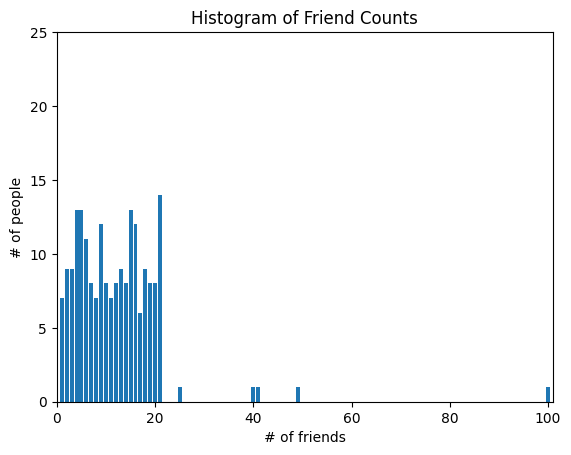

In [19]:
import matplotlib.pyplot as plt
make_friend_counts_histogram(plt)

In [20]:
num_points = len(num_friends)

largest_value = max(num_friends)
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1] 
second_largest_value = sorted_values[-2]

print("num_points", len(num_friends)) 
print("largest value", max(num_friends)) 
print("smallest value", min(num_friends)) 
print("second_smallest_value", sorted_values[1]) 
print("second_largest_value", sorted_values[-2] )

num_points 204
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49


In [22]:
import numpy as np

num_friends = np.array(num_friends)

num_points = num_friends.shape[0]

largest_value = np.max(num_friends)
smallest_value = np.min(num_friends)

sorted_values = np.sort(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print("num_points", len(num_friends)) 
print("largest value", max(num_friends)) 
print("smallest value", min(num_friends)) 
print("second_smallest_value", sorted_values[1]) 
print("second_largest_value", sorted_values[-2] )

num_points 204
largest value 100
smallest value 1
second_smallest_value 1
second_largest_value 49


In [25]:
def mean(x):
    return sum(x)/ len(x)

def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi])

def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

def npmode(x):
    npx = np.array(x)
    npxx = np.bincount(npx)
    return np.argmax(npxx)




In [26]:
print("mean(num_friends)", mean(num_friends))
print("median(num_friends)", median(num_friends))
print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))
print("mode(num_friends)", mode(num_friends))
print("numpy version mode(num_friends)", npmode(num_friends))

mean(num_friends) 12.004901960784315
median(num_friends) 22
quantile(num_friends, 0.10) 3
quantile(num_friends, 0.25) 6
quantile(num_friends, 0.75) 16
quantile(num_friends, 0.90) 20
mode(num_friends) [21]
numpy version mode(num_friends) 21


In [27]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n""" 
    return dot(v, v)

In [28]:
import math

def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    n = len(x)
    deviations = de_mean(x)

    return sum_of_squares(deviations)/ (n-1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x,0.75) - quantile(x, 0.25)

In [29]:
print("data_range(num_friends)", data_range(num_friends))
print("variance(num_friends)", variance(num_friends))
print("standard_deviation(num_friends)", standard_deviation(num_friends))
print("interquartile_range(num_friends)", interquartile_range(num_friends))

data_range(num_friends) 99
variance(num_friends) 91.47288225635074
standard_deviation(num_friends) 9.564145662648114
interquartile_range(num_friends) 10


In [31]:
num_friends = np.array(num_friends)
print("data_range(num_friends)", np.ptp(num_friends)) # peak to peak 
print("data_range(num_friends)", np.max(num_friends) - np.min(num_friends)) 
print("variance(num_friends)", np.var(num_friends, ddof=1)) 
print("standard_deviation(num_friends)", np.std(num_friends, ddof=1))
q75, q25 = np.percentile(num_friends, [75 ,25]) 
print("interquartile_range(num_friends)", q75 - q25)
num_friends = list(num_friends)

data_range(num_friends) 99
data_range(num_friends) 99
variance(num_friends) 91.47288225635083
standard_deviation(num_friends) 9.56414566264812
interquartile_range(num_friends) 10.25


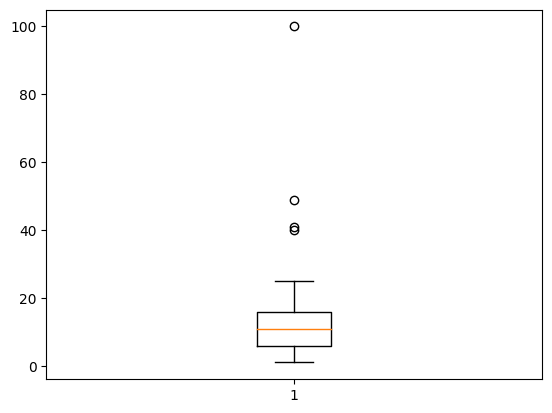

In [32]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
plt.boxplot(num_friends)
plt.show()

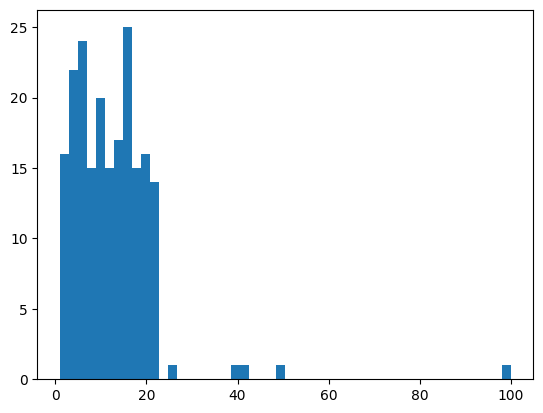

In [33]:
plt.hist(num_friends, bins = 50)
plt.show()

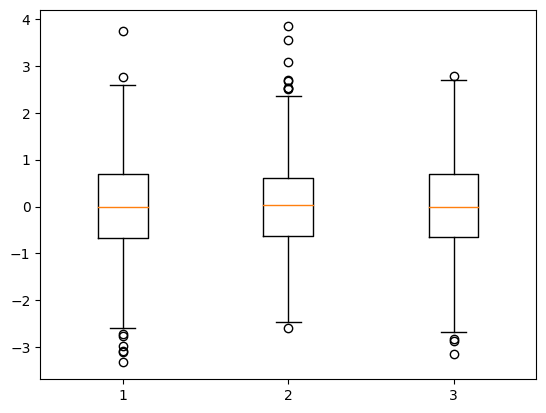

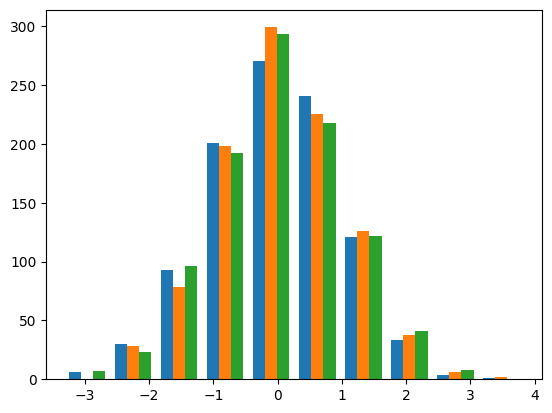

In [34]:
data = np.random.randn(1000,3)
plt.boxplot(data)
plt.show()
plt.hist(data, bins=10)
plt.show()

In [35]:
print(np.std([1,2,3]))
print(np.std([1,2,3], ddof=1))
print(standard_deviation([1,2,3]))

0.816496580927726
1.0
1.0


In [41]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) /(n-1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x/ stdev_y
    else:
        return 0

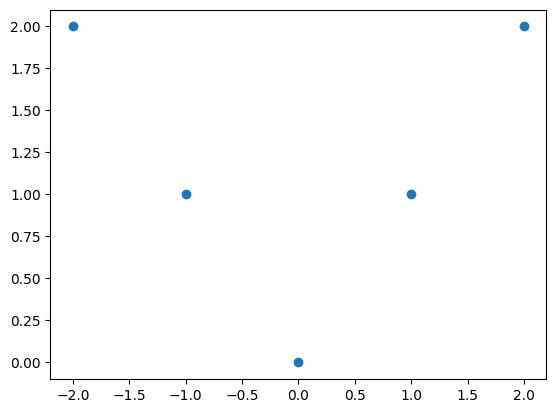

In [37]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]
plt.scatter(x, y)
plt.show()

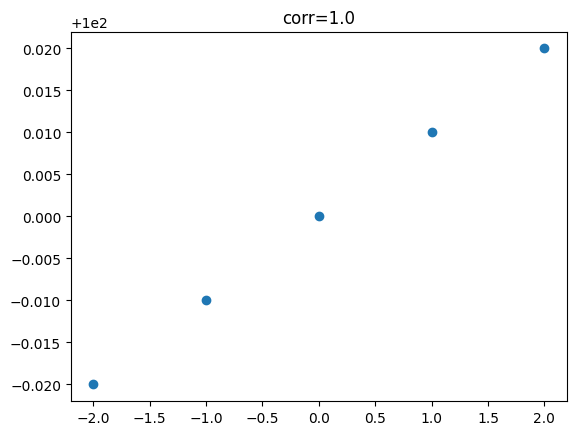

In [42]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
plt.scatter(x, y)
plt.title('corr={:.2}'.format(correlation(x,y)))
plt.show()

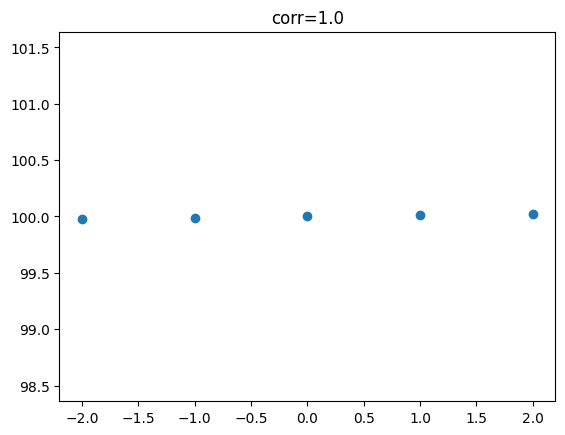

In [43]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]
plt.scatter(x, y)
plt.axis('equal')
plt.title('corr={:.2}'.format(correlation(x,y)))
plt.show()